# Describing the ambiguity
Compare the two visualizations of 100 random die rolls below (in die_rolls).

- with bin edges falling on the observation values in the left subplot,
- and bin edges in between the observation values in the right subplot.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

die_rolls = pd.read_csv('die-rolls.csv')

# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


## Shifting the edges of the bars 
This can remove ambiguity in the case of Discrete data

The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

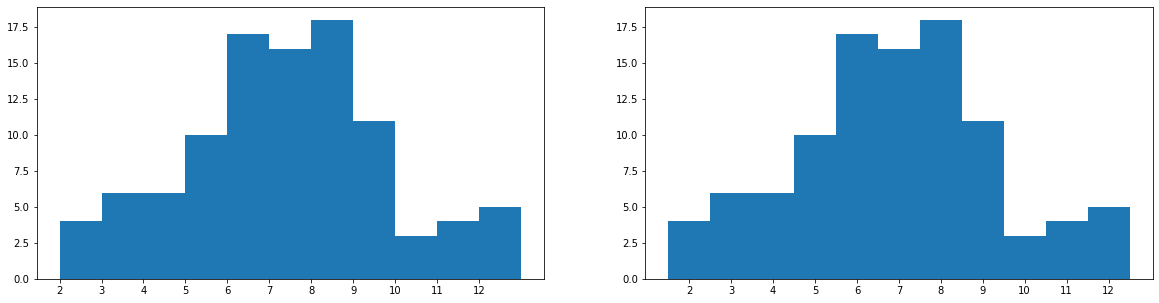

In [7]:
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # 1.1 rather than just the desired bin width of 1
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1) #the max value is (12)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

## Making gaps between individual bars
We can adds the `rwidth` parameter to set the proportion of the bin widths that will be filled by each histogram bar.

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

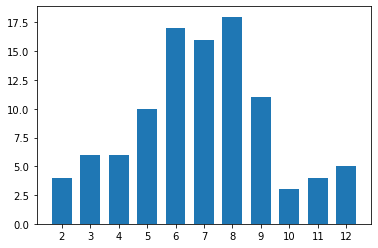

In [9]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(2, 12+1, 1));

For continuous numeric data, you should not make use of the `rwidth` parameter, since the gaps imply discreteness of value.

As another caution, it might be tempting to use seaborn's `countplot` function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars.(For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) 
 
Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable.

If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

# Descriptive Statistics, Outliers, and Axis Limits
As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like the number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. Let's see a few examples.

## Plot the histogram from the data having a skewed distribution of values

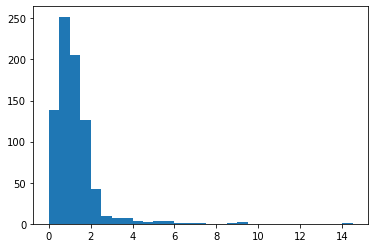

In [14]:
pokemon = pd.read_csv('pokemon.csv')
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

## Plot the histogram with a changed axis limit
Alternatively, the xlim function can be called with two numeric arguments only, plt.xlim(0,6), to get the same result.

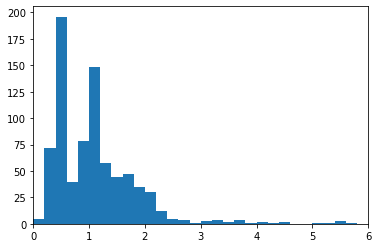

In [15]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim((0,6));

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 6 to those that take values greater than 6. For anything that is concentrated on the bulk of the data in the former group (< 6), the use of axis limits can allow focusing on data points in that range without needing to go through the creation of new DataFrame filtering out the data points in the latter group (> 6).

## Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side

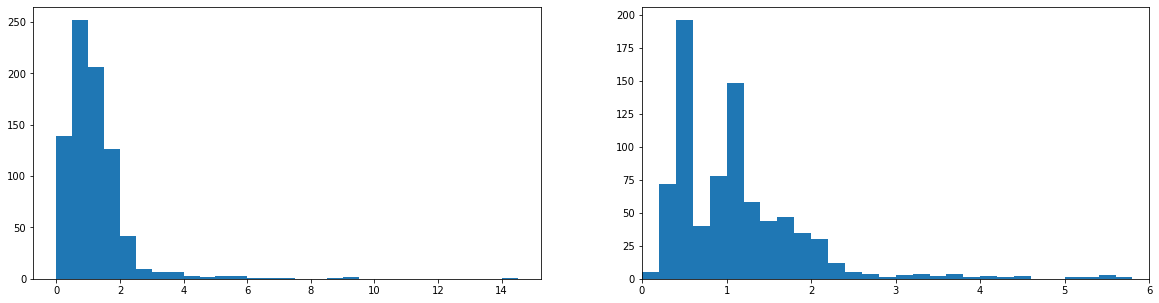

In [30]:
fig1 = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);


plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim((0,6));


# Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

## Scale the x-axis to log-type

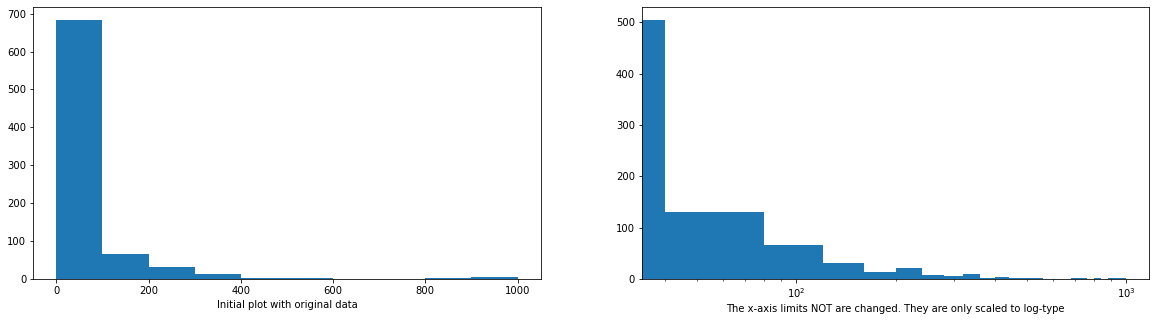

In [32]:
pokemon = pd.read_csv('pokemon.csv')
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');

In [36]:
pokemon['weight'].describe() 

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

The default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.**The scale transformation is the solution.** In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead.

## Scale the x-axis to log-type, and change the axis limit.

In [37]:
np.log10(pokemon['weight'].describe()) #note min and max

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

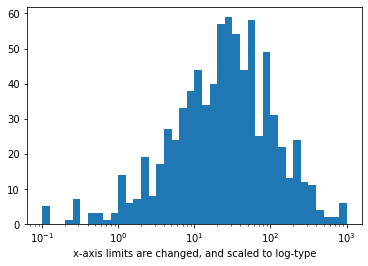

In [39]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log')
plt.xlabel('x-axis limits are changed, and scaled to log-type');

## Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

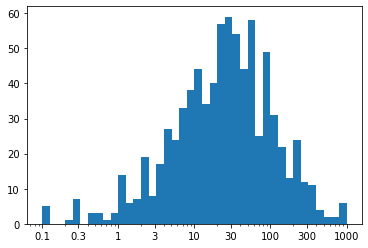

In [42]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log')

# Generate the x-ticks we want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels); #locations and labels in their natural units, no change
#xticks shall be specified after xscale 
#since that function has its own built-in tick settings.

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.
## Alternative Approach
When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data.

## Custom scaling the given data Series
Instead of using the built-in log scale.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. 

For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

In [44]:
def sqrt_trans(x, inverse = False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

In [45]:
# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

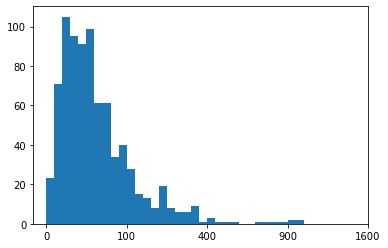

In [46]:
# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)
# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));